In [9]:
import seaborn as sns
import os 
import pandas as pd

In [20]:
list_of_results = []
# loop through all dirs in results
base_path = 'results/results/'
for net_dir in os.listdir(base_path):

    if net_dir == 'github': continue
    path = os.path.join(base_path, net_dir)

    # loop through all files in dir
    for dim_dir in os.listdir(path):

        dim_path = os.path.join(path, dim_dir) 

        # loop through all files in dir
        for result_file in os.listdir(os.path.join(dim_path, 'evaluated_results')):

            result_path = os.path.join(dim_path, 'evaluated_results', result_file)
            
            # load results
            df = pd.read_csv(result_path, header=None)
            # add to list
            list_of_results.append([net_dir, dim_dir, df.values.T[0][1]])

In [21]:
# convert to dataframe
df = pd.DataFrame(list_of_results, columns=['network', 'dimension', 'divergence_score'])

In [22]:
df

,network,dimension,divergence_score
0,airports,dim_128,0.028165
1,airports,dim_128,0.047308
2,airports,dim_128,0.052815
3,airports,dim_128,0.033641
4,airports,dim_128,0.033397
...,...,...,...
895,mouse_brain,dim_8,0.016052
896,mouse_brain,dim_8,0.016077
897,mouse_brain,dim_8,0.016034
898,mouse_brain,dim_8,0.016003


<Axes: xlabel='dimension', ylabel='divergence_score'>

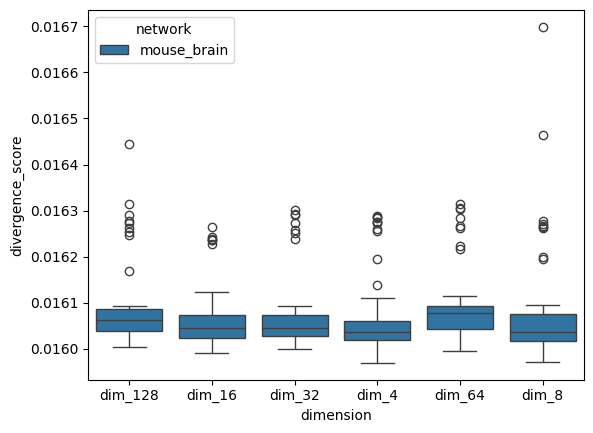

In [25]:
# box plot of mouse brain net, hue by dimension
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'mouse_brain'])

<Axes: xlabel='dimension', ylabel='divergence_score'>

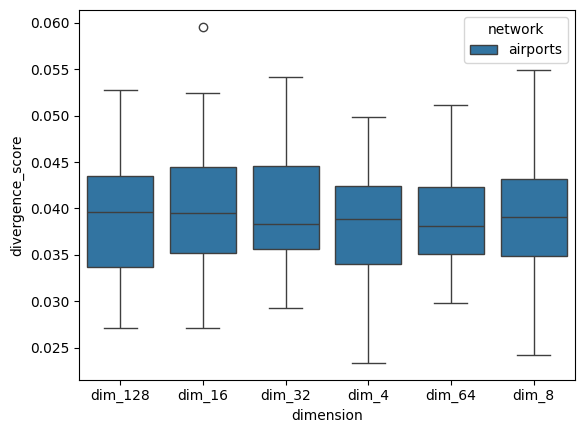

In [26]:
# airports
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'airports'])

<Axes: xlabel='dimension', ylabel='divergence_score'>

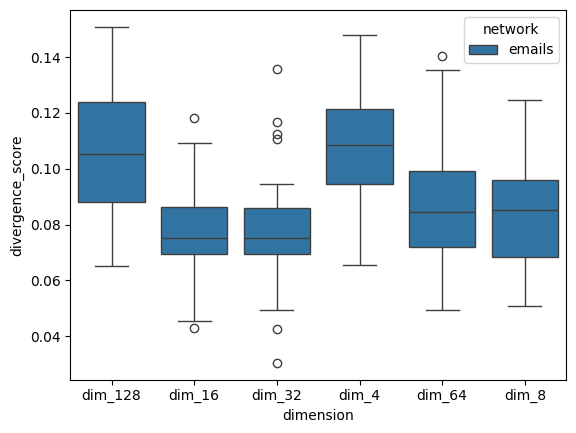

In [27]:
# emails 
sns.boxplot(x='dimension', y='divergence_score', hue='network', data=df[df['network'] == 'emails'])